In [113]:
import seaborn as sns; sns.set(font="IPAexGothic")
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
print(sns.__version__)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

np.random.seed(1000)

d = pd.read_csv("Y_TEST.csv")

0.9.0


# dataの中身の確認

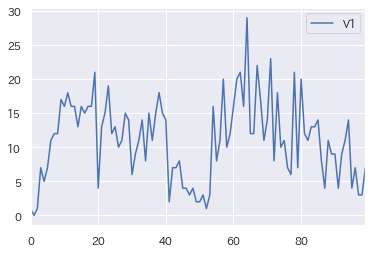

In [114]:
d.plot()

In [115]:
d[d.columns[0]].dtypes

dtype('int64')

# pystan model記述

In [116]:
import pystan
#;のあとにスペース TABがあるとエラー吐く
model = '''
data {
    int N;
    int Y[N];
}
parameters {
    vector[N] r;
    real<lower=0> s;
    real<lower=0> beta;
}
model {
  for (j in 2: N )
      r[j] ~ normal( r[j-1] , s);
  Y ~ poisson_log( r + beta );
}
generated quantities{
    vector[N] Y_mean;
    Y_mean =exp( r+beta );
}
'''

# sampling 実行

In [117]:
dat = {'N': d.shape[0],
       'Y': d[d.columns[0]]
      }

n_itr = 10000
n_warmup = 3000
#モデル作成
%time model = pystan.StanModel(model_code=model)
#サンプリング実行
%time fit = model.sampling(data=dat, iter=n_itr, warmup=n_warmup)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_11bafb632b427bd69d16345c17f21433 NOW.


Wall time: 1min 1s


Wall time: 36.3 s


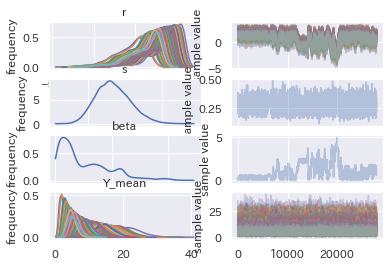

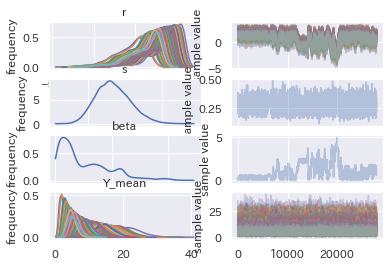

In [118]:
fit.plot()

In [119]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_11bafb632b427bd69d16345c17f21433.
4 chains, each with iter=10000; warmup=3000; thin=1; 
post-warmup draws per chain=7000, total post-warmup draws=28000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r[1]    -0.3    0.36    1.0  -2.77   -0.9  -0.09   0.45   1.12      8   1.28
r[2]   -0.21    0.36   0.99  -2.66   -0.8   0.02   0.52   1.14      7    1.3
r[3]    0.04    0.36   0.97  -2.39  -0.54    0.3   0.77   1.32      7   1.31
r[4]    0.44    0.36   0.96  -1.96  -0.13   0.72   1.16   1.66      7   1.32
r[5]    0.66    0.36   0.95  -1.75   0.09   0.94   1.38   1.86      7   1.33
r[6]    0.92    0.36   0.95  -1.48   0.36   1.21   1.64    2.1      7   1.33
r[7]     1.2    0.36   0.94  -1.22   0.63    1.5   1.92   2.36      7   1.33
r[8]    1.37    0.36   0.94  -1.06    0.8   1.67   2.09   2.51      7   1.33
r[9]    1.49    0.36   0.94  -0.93   0.93    1.8   2.21   2.63      7   1.33

In [120]:
r_d = pd.DataFrame(fit['r'])
r_d.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.660818,0.759086,1.026118,1.323942,1.405409,1.793611,2.149638,2.115111,2.276281,2.586816,...,1.958086,2.033935,2.015753,2.244754,2.047295,1.603127,1.402477,1.671204,1.674109,1.732696
1,0.152403,0.448373,0.605148,1.071203,1.119097,1.580910,1.555827,1.858094,1.861258,1.928269,...,1.345056,1.388475,1.251456,1.360584,1.688133,1.233026,1.091892,0.918164,0.858289,0.966846
2,0.805433,0.821538,0.745497,1.027802,1.578571,1.667155,1.638088,1.899953,2.214238,2.290300,...,1.255476,1.396330,1.513716,1.539838,1.928178,1.235838,1.201688,1.424499,1.199763,1.413433
3,0.997740,0.936223,1.260233,2.090977,2.064011,1.935999,2.289298,2.379613,2.518332,2.950916,...,1.739239,1.645068,2.257458,2.553445,2.427863,1.156612,1.841935,1.013614,1.208338,1.499931
4,-0.452290,-0.253416,0.404572,1.117789,1.466176,1.507322,1.782659,1.921412,1.965518,2.034105,...,1.328841,1.657677,1.776066,2.003888,1.565410,1.503686,1.163127,1.183901,1.175323,1.154098


In [126]:
fit.extract()

OrderedDict([('r',
              array([[ 0.66081799,  0.75908584,  1.02611807, ...,  1.67120375,
                       1.67410851,  1.73269565],
                     [ 0.15240301,  0.44837309,  0.60514799, ...,  0.91816394,
                       0.85828862,  0.96684601],
                     [ 0.80543287,  0.82153751,  0.74549739, ...,  1.42449922,
                       1.19976343,  1.41343277],
                     ...,
                     [-1.05977909, -1.16242957, -0.23822574, ...,  0.18395875,
                       0.48198134,  0.57763656],
                     [ 0.60066987,  0.78785957,  1.0073418 , ...,  1.67140731,
                       1.57607433,  1.5883738 ],
                     [ 0.00232019,  0.10607497, -0.04878501, ...,  1.11811992,
                       0.99382586,  1.71424549]])),
             ('s',
              array([0.22130271, 0.30214446, 0.24325197, ..., 0.3454663 , 0.23324551,
                     0.29735612])),
             ('beta',
              array([

In [129]:
fit.extract()

OrderedDict([('r',
              array([[ 0.66081799,  0.75908584,  1.02611807, ...,  1.67120375,
                       1.67410851,  1.73269565],
                     [ 0.15240301,  0.44837309,  0.60514799, ...,  0.91816394,
                       0.85828862,  0.96684601],
                     [ 0.80543287,  0.82153751,  0.74549739, ...,  1.42449922,
                       1.19976343,  1.41343277],
                     ...,
                     [-1.05977909, -1.16242957, -0.23822574, ...,  0.18395875,
                       0.48198134,  0.57763656],
                     [ 0.60066987,  0.78785957,  1.0073418 , ...,  1.67140731,
                       1.57607433,  1.5883738 ],
                     [ 0.00232019,  0.10607497, -0.04878501, ...,  1.11811992,
                       0.99382586,  1.71424549]])),
             ('s',
              array([0.22130271, 0.30214446, 0.24325197, ..., 0.3454663 , 0.23324551,
                     0.29735612])),
             ('beta',
              array([

In [121]:
result = pd.DataFrame(fit.extract()['r'])

In [123]:
Y_mean = fit.extract('Y_mean')['Y_mean']

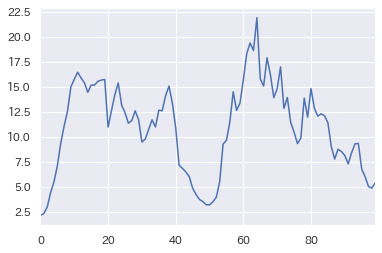

In [132]:
Y_mean = pd.DataFrame(Y_mean)
Y_mean.median().plot()

In [153]:
Y_mean

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.235571,2.466412,3.221337,4.338899,4.707172,6.939917,9.907739,9.571498,11.245409,15.340473,...,8.180591,8.825223,8.666211,10.896403,8.943919,5.736249,4.693390,6.140353,6.158215,6.529786
1,2.010366,2.702796,3.161548,5.038540,5.285728,8.388178,8.180394,11.067441,11.102511,11.871994,...,6.625793,6.919810,6.033757,6.729477,9.337574,5.923570,5.143869,4.323553,4.072277,4.539240
2,3.903791,3.967169,3.676689,4.875960,8.457778,9.241188,8.976440,11.663546,15.970666,17.232816,...,6.122630,7.048714,7.926653,8.136442,11.997441,6.003563,5.802006,7.250094,5.790848,7.170304
3,2.988063,2.809784,3.884981,8.916125,8.678906,7.636078,10.871918,11.899517,13.670175,21.068964,...,6.272179,5.708480,10.531204,14.158704,12.487745,3.502570,6.950545,3.035873,3.688512,4.937286
4,1.092954,1.333435,2.574736,5.253862,7.443572,7.756229,10.214759,11.735124,12.264305,13.134986,...,6.488400,9.014654,10.147633,12.744028,8.220118,7.728078,5.497548,5.612946,5.565003,5.448130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,2.361572,2.580236,3.057956,3.093506,5.289831,6.283109,7.979875,11.498186,13.463371,14.452518,...,8.192993,8.916387,10.278051,8.347861,6.603323,7.102796,6.615739,4.008440,3.756715,4.949589
27996,1.181356,1.496097,3.032232,4.291718,4.475234,5.536491,9.726367,10.269695,8.978868,11.041844,...,9.426796,8.554641,6.512996,7.586767,8.293986,8.241740,7.678624,6.764343,4.702055,7.834779
27997,1.449734,1.308302,3.296739,3.322102,5.680701,7.265043,9.213486,8.235414,8.068271,18.646335,...,8.599368,11.163162,10.708593,11.978929,11.491239,6.665932,4.327309,5.028482,6.774332,7.454337
27998,2.073379,2.500197,3.113824,4.612186,5.568230,7.313615,9.058451,11.468081,11.723743,14.223958,...,8.010104,8.970478,10.187765,15.351896,10.964784,7.034428,6.203097,6.049147,5.499099,5.567153


In [141]:
Y_mean.mean()

0     2.256618
1     2.416954
2     3.070270
3     4.530282
4     5.604326
        ...   
95    6.897220
96    6.138393
97    5.124466
98    4.982891
99    5.580007
Length: 100, dtype: float64

Text(0, 0.5, 'number of individuals $y_j$')

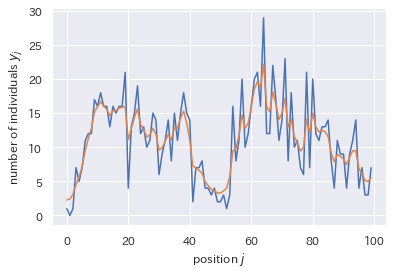

In [176]:
sns.lineplot(y=d[d.columns[0]],x=d.index)
sns.lineplot(y=Y_mean.mean(),x=range(len(Y_mean.mean())))
plt.xlabel('position $j$')
plt.ylabel('number of individuals $y_j$')

In [127]:
print(fit.stansummary(pars=None, probs=(0.025, 0.25, 0.5, 0.75, 0.975), digits_summary=2))

Inference for Stan model: anon_model_11bafb632b427bd69d16345c17f21433.
4 chains, each with iter=10000; warmup=3000; thin=1; 
post-warmup draws per chain=7000, total post-warmup draws=28000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r[1]          -0.3    0.36    1.0  -2.77   -0.9  -0.09   0.45   1.12      8   1.28
r[2]         -0.21    0.36   0.99  -2.66   -0.8   0.02   0.52   1.14      7    1.3
r[3]          0.04    0.36   0.97  -2.39  -0.54    0.3   0.77   1.32      7   1.31
r[4]          0.44    0.36   0.96  -1.96  -0.13   0.72   1.16   1.66      7   1.32
r[5]          0.66    0.36   0.95  -1.75   0.09   0.94   1.38   1.86      7   1.33
r[6]          0.92    0.36   0.95  -1.48   0.36   1.21   1.64    2.1      7   1.33
r[7]           1.2    0.36   0.94  -1.22   0.63    1.5   1.92   2.36      7   1.33
r[8]          1.37    0.36   0.94  -1.06    0.8   1.67   2.09   2.51      7   1.33
r[9]          1.49    0.36   0.94  -0.93   0.93    1.8   2.21 

In [160]:
q_range = [0.1,0.25,0.75,0.9]
Y_mean_quntile = Y_mean.quantile(q_range).T
Y_mean_quntile

,0.10,0.25,0.75,0.90
0,1.242438,1.618454,2.760329,3.423478
1,1.432624,1.821309,2.903913,3.510481
2,1.982176,2.423878,3.612333,4.287130
3,3.172309,3.717578,5.218064,6.035112
4,4.032217,4.661698,6.397106,7.345890
...,...,...,...,...
95,5.056748,5.822983,7.800274,8.922983
96,4.443258,5.144971,7.007542,8.011056
97,3.611437,4.251546,5.892062,6.771321
98,3.431801,4.072082,5.766356,6.677390


Text(0, 0.5, 'number of individuals $y_j$')

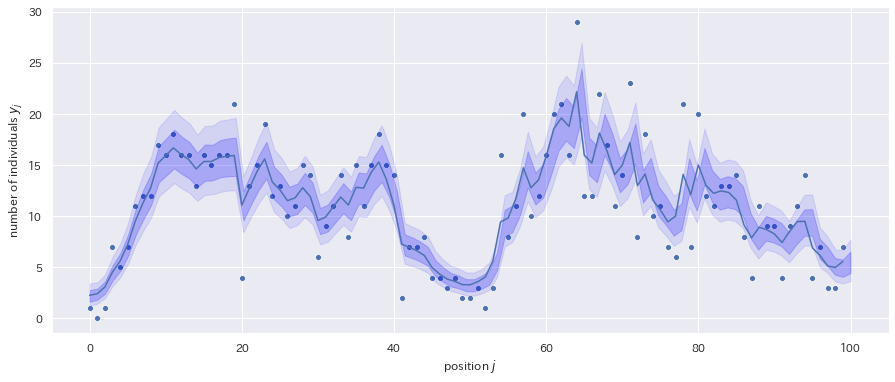

In [175]:
# 描画
plt.figure(figsize=(15,6))

x = np.linspace(0, len(Y_mean_quntile), len(Y_mean_quntile))
q010 = Y_mean_quntile[Y_mean_quntile.columns[0]] #0.1
q025 = Y_mean_quntile[Y_mean_quntile.columns[1]] #0.25
q075 = Y_mean_quntile[Y_mean_quntile.columns[2]] #0.75
q090 = Y_mean_quntile[Y_mean_quntile.columns[3]] #0.9

sns.scatterplot(y=d[d.columns[0]],x=d.index)
sns.lineplot(y=Y_mean.mean(),x=range(len(Y_mean.mean())))
plt.fill_between(x, q025, q075, color='blue', alpha=0.2)
plt.fill_between(x, q010, q090, color='blue', alpha=0.1)

plt.xlabel('position $j$')
plt.ylabel('number of individuals $y_j$')